# Data Preparation

In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df=pd.read_csv('Referral_Join_Prediction.csv')

In [41]:
df.drop(columns=['referral_id'],inplace=True)

Drop referral_id column as it is not required

In [42]:
df.head(3)

,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
0,28,5.0,Delhi,106,89.0,72,87.0,83.0,Male,123.0,10.00,33.04,?,10.0,3,141,EL0,Yes
1,26,3.0,Pune,65,63.0,77,94.0,85.0,Male,83.0,6.09,27.39,20.87,10.0,10,80,ML0,Yes
2,23,2.0,Mumbai,45,92.0,85,84.0,72.0,Male,62.0,41.74,2.61,40.00,2.0,1,60,EL0,No


In [43]:
df['referral_10_th_marks'] = np.where(df['referral_10_th_marks'].isnull(),df['referral_10_th_marks'].mean(),df['referral_10_th_marks'])
df['referral_10_th_marks'] = np.where(df['referral_10_th_marks'] < 0,df['referral_10_th_marks'].mean(),df['referral_10_th_marks'])
df['referral_graduation_marks'] = np.where((df['referral_graduation_marks'].isnull()) | (df['referral_graduation_marks']< 0 ),df['referral_graduation_marks'].mean(),df['referral_10_th_marks'])
df[(df['referral_graduation_marks'].isnull()) | (df['referral_graduation_marks']< 0 )]

,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined


In [44]:
df['referral_aptitude_numerical_score'] = np.where(df['referral_aptitude_numerical_score'].isnull(),-1,df['referral_aptitude_numerical_score'])
df['referral_aptitude_numerical_score'] = np.where(df['referral_aptitude_numerical_score']=='?',-1,df['referral_aptitude_numerical_score'])

df['referral_aptitude_numerical_score'] =df['referral_aptitude_numerical_score'].astype(float)

df['referral_aptitude_reasoning_score'] = np.where(df['referral_aptitude_reasoning_score'].isnull(),-1,df['referral_aptitude_reasoning_score'])
df['referral_aptitude_reasoning_score'] = np.where(df['referral_aptitude_reasoning_score']=='?',-1,df['referral_aptitude_reasoning_score'])

df['referral_aptitude_reasoning_score'] =df['referral_aptitude_reasoning_score'].astype(float)

In [45]:
cols = ['referral_post_grad_marks','referral_expected_sal','referral_expected_sal','referral_aptitude_numerical_score','referral_aptitude_verbal_score','referral_aptitude_reasoning_score','referral_Management_Interview_score']

for col in cols:
    df[col] = np.where((df[col].isnull()) | (df[col] < 0),df[col].mean(),df[col])

In [46]:
df.isnull().sum()

referral_age                           0
referral_exp_in_years                  0
referral_preferred_city                0
referral_current_salary                0
referral_10_th_marks                   0
referral_12th_marks                    0
referral_graduation_marks              0
referral_post_grad_marks               0
referral_gender                        0
referral_expected_sal                  0
referral_aptitude_numerical_score      0
referral_aptitude_verbal_score         0
referral_aptitude_reasoning_score      0
referral_Management_Interview_score    0
referral_HR_Interview_score            0
Salary offered                         0
Emp_Salary_Grade                       0
Joined                                 0
dtype: int64

In [47]:
num = []
cat = []

for col in df.columns:
    if df[col].dtype=='object':
        cat.append(col)
    else :
        num.append(col)


In [48]:
print('Categorical Columns : {}'.format(cat))

Categorical Columns : ['referral_preferred_city', 'referral_gender', 'Emp_Salary_Grade', 'Joined']


In [49]:
print('Numerical Columns : {}'.format(num))

Numerical Columns : ['referral_age', 'referral_exp_in_years', 'referral_current_salary', 'referral_10_th_marks', 'referral_12th_marks', 'referral_graduation_marks', 'referral_post_grad_marks', 'referral_expected_sal', 'referral_aptitude_numerical_score', 'referral_aptitude_verbal_score', 'referral_aptitude_reasoning_score', 'referral_Management_Interview_score', 'referral_HR_Interview_score', 'Salary offered']


# Scaling Method 1 (zscore)

In [34]:
from scipy.stats import zscore


In [50]:
z_scaled=df[num].apply(zscore)

In [55]:
z_scaled.describe()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,-1.085749e-16,9.878538e-17,-4.449792e-17,1.168515e-15,5.842576e-16,1.181420e-16,-8.080822e-16,3.666628e-16,4.583285e-17,-1.184201e-16,-1.263741e-16,-1.174745e-16,-2.227677e-17,9.166571e-17
std,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00
min,-2.498982e+00,-1.171107e+00,-1.170604e+00,-1.656266e+00,-5.995608e+00,-1.655236e+00,-1.746989e+00,-1.173312e+00,-1.644252e+00,-1.754718e+00,-1.754688e+00,-1.622621e+00,-8.464606e-01,-1.179563e+00
25%,-7.190903e-01,-7.875531e-01,-7.897520e-01,-8.970373e-01,-7.763793e-01,-8.950994e-01,-8.863596e-01,-7.975362e-01,-8.783234e-01,-8.277956e-01,-7.971391e-01,-9.369484e-01,-4.824935e-01,-7.990954e-01
50%,-7.133833e-03,-2.044594e-02,-2.804869e-02,5.199914e-02,-4.385598e-02,-1.189864e-02,-2.573054e-02,-9.722615e-02,-4.356474e-02,-8.235822e-03,-1.674821e-02,9.156072e-02,-1.185264e-01,-1.913773e-02
75%,7.048227e-01,7.466613e-01,7.526972e-01,9.061319e-01,8.717982e-01,9.102248e-01,9.783367e-01,5.860032e-01,8.788316e-01,8.826257e-01,7.957852e-01,7.772334e-01,4.274243e-01,7.417966e-01
max,1.352004e+01,1.455459e+01,1.459665e+01,2.424590e+00,1.604322e+00,2.430498e+00,2.173655e+00,1.300370e+01,1.801228e+00,1.773487e+00,4.880877e+00,1.462906e+00,1.917173e+01,1.457178e+01


/home/daniel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


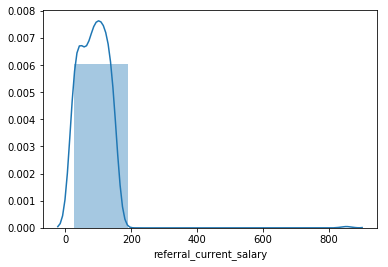

In [63]:
# Distribution before zscore encoding
sns.distplot(df['referral_current_salary'],bins=5)

/home/daniel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


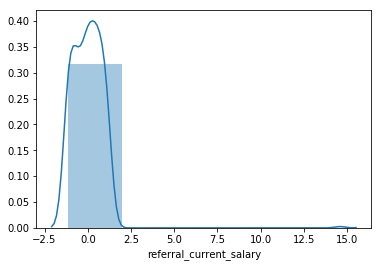

In [64]:
# Distribution after zscore encoding
sns.distplot(z_scaled['referral_current_salary'],bins=5)

No diffrences in data spread but scale have changed.

# Scaling Method 2 (StandardScalar)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
std = StandardScaler()

In [54]:
std_scaled = std.fit_transform(df[num])

In [57]:
std_scaled=pd.DataFrame(std_scaled,columns=df[num].columns)

In [58]:
std_scaled.describe()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,-1.085749e-16,9.878538e-17,-4.449792e-17,1.168515e-15,5.842576e-16,1.181420e-16,-8.080822e-16,3.666628e-16,4.583285e-17,-1.184201e-16,-1.263741e-16,-1.174745e-16,-2.227677e-17,9.166571e-17
std,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00
min,-2.498982e+00,-1.171107e+00,-1.170604e+00,-1.656266e+00,-5.995608e+00,-1.655236e+00,-1.746989e+00,-1.173312e+00,-1.644252e+00,-1.754718e+00,-1.754688e+00,-1.622621e+00,-8.464606e-01,-1.179563e+00
25%,-7.190903e-01,-7.875531e-01,-7.897520e-01,-8.970373e-01,-7.763793e-01,-8.950994e-01,-8.863596e-01,-7.975362e-01,-8.783234e-01,-8.277956e-01,-7.971391e-01,-9.369484e-01,-4.824935e-01,-7.990954e-01
50%,-7.133833e-03,-2.044594e-02,-2.804869e-02,5.199914e-02,-4.385598e-02,-1.189864e-02,-2.573054e-02,-9.722615e-02,-4.356474e-02,-8.235822e-03,-1.674821e-02,9.156072e-02,-1.185264e-01,-1.913773e-02
75%,7.048227e-01,7.466613e-01,7.526972e-01,9.061319e-01,8.717982e-01,9.102248e-01,9.783367e-01,5.860032e-01,8.788316e-01,8.826257e-01,7.957852e-01,7.772334e-01,4.274243e-01,7.417966e-01
max,1.352004e+01,1.455459e+01,1.459665e+01,2.424590e+00,1.604322e+00,2.430498e+00,2.173655e+00,1.300370e+01,1.801228e+00,1.773487e+00,4.880877e+00,1.462906e+00,1.917173e+01,1.457178e+01


# Scaling Method 3 (Min-Max)

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
minmax=MinMaxScaler()

In [61]:
minmax_scaled=minmax.fit_transform(df[num])

In [62]:
minmax_scaled=pd.DataFrame(minmax_scaled,columns=df[num].columns)

# Transformation

In [66]:
# Lets take any one of the featurea and apply transformation.
# Ideally transformations should be done for all the numerical columns

print('Skewness :  {} '.format(df['referral_current_salary'].skew()))
print('Kurtosis :  {} '.format(df['referral_current_salary'].kurtosis()))

Skewness :  6.184346309755603 
Kurtosis :  89.46603642396403 


### Method 1 (log transformations)

In [67]:
import numpy as np

In [68]:
print('Skewness :  {} '.format(np.log(df['referral_current_salary'].skew())))
print('Kurtosis :  {} '.format(np.log(df['referral_current_salary'].kurtosis())))

Skewness :  1.8220213106478522 
Kurtosis :  4.49385907196307 


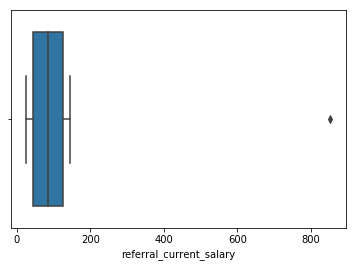

In [71]:
# Before the transformations
sns.boxplot(df['referral_current_salary'])

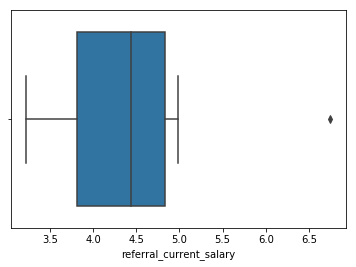

In [70]:
# After the transformations
sns.boxplot(np.log(df['referral_current_salary']))

### Method 2 (sqrt transformations)

In [72]:
print('Skewness :  {} '.format(np.sqrt(df['referral_current_salary'].skew())))
print('Kurtosis :  {} '.format(np.sqrt(df['referral_current_salary'].kurtosis())))

Skewness :  2.4868345963806284 
Kurtosis :  9.458648763114319 


/home/daniel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


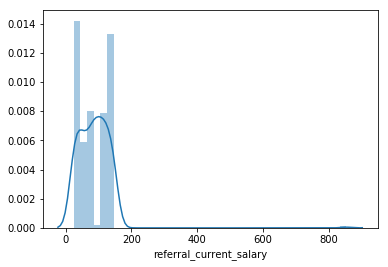

In [75]:
sns.distplot(df['referral_current_salary'])

/home/daniel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


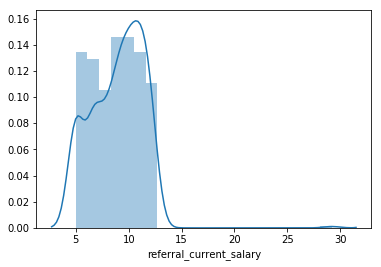

In [76]:
sns.distplot(np.sqrt(df['referral_current_salary']))

### Method 3 (root of 10 transformations)

In [79]:
print('Skewness :  {} '.format((df['referral_current_salary']**0.1).skew()))
print('Kurtosis :  {} '.format((df['referral_current_salary']**0.1).kurtosis()))

Skewness :  -0.3950105143684112 
Kurtosis :  0.04120887026425146 


Out of above three transformation technique root of 10 is giving better results.
We can choose the transformation technique with respective to the Algorithm we use.
Note : We need to trnaform the values back to the original format once model built and predicted.

# Outlier Treatment

In [81]:
df['referral_current_salary1']=df['referral_current_salary']
df['referral_current_salary2']=df['referral_current_salary']

#### Z Score Method

In [102]:
df['referral_current_salary_zscore']=(df.referral_current_salary - df.referral_current_salary.mean())/df.referral_current_salary.std()

In [103]:
df['referral_current_salary'].describe()

count    499.000000
mean      86.472946
std       52.566584
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      853.000000
Name: referral_current_salary, dtype: float64

In [104]:
df['referral_current_salary_zscore'].describe()

count    4.990000e+02
mean     1.824415e-17
std      1.000000e+00
min     -1.169430e+00
25%     -7.889603e-01
50%     -2.802057e-02
75%      7.519426e-01
max      1.458202e+01
Name: referral_current_salary_zscore, dtype: float64

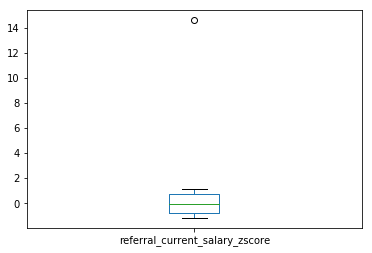

In [106]:
df['referral_current_salary_zscore'].plot(kind='box')

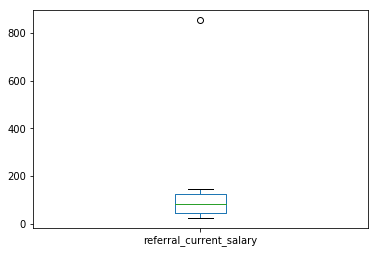

In [107]:
df['referral_current_salary'].plot(kind='box')

In [108]:
# outlier if greater than 3
df[df['referral_current_salary_zscore'] > 3]

,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,...,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined,referral_current_salary1,referral_current_salary2,referral_current_salary_zscore
354,65,42.0,Mumbai,853,61.0,95,61.0,68.0,Male,870.0,...,33.48,29.13,7.0,3,868,EL0,No,853,853,14.582021


In [109]:
# outlier if lessthan -3
df[df['referral_current_salary_zscore'] < -3]

,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,...,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined,referral_current_salary1,referral_current_salary2,referral_current_salary_zscore


In [110]:
# Calculate zscore impute values
referral_current_salary_zscore=(3*df.referral_current_salary.std())+df.referral_current_salary.std()
round(referral_current_salary_zscore)

210

In [113]:
list1=df[df['referral_current_salary_zscore'] > 3].index

In [114]:
list1

Int64Index([354], dtype='int64')

In [115]:
df['referral_current_salary']=np.where(df.index.isin(list1),round(referral_current_salary_zscore),df['referral_current_salary'])

In [116]:
df['referral_current_salary'].describe()

count    499.000000
mean      85.184369
std       40.154397
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      210.000000
Name: referral_current_salary, dtype: float64

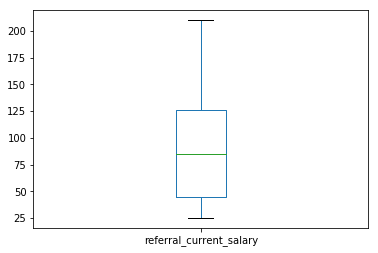

In [117]:
df['referral_current_salary'].plot(kind='box')

In [118]:
df.drop(columns=['referral_current_salary_zscore'],inplace=True)

#### Box plot Method

In [119]:
def detect_outlier(col):
    Q3,Q1=np.percentile(col,[75,25])
    iqr=Q3-Q1
    lower_outlier_range=Q1-(1.5*iqr)
    upper_outlier_range=Q3+(1.5*iqr)
    return lower_outlier_range,upper_outlier_range

In [120]:
lr,ur=detect_outlier(df['referral_current_salary'])

In [122]:
print('Lower Range : {} Outer Range : {}'.format(lr,ur))

Lower Range : -76.5 Outer Range : 247.5
